In [1]:
] activate .

In [189]:
include("../src/StableDQMC.jl")
using .StableDQMC

In [249]:
using GenericSVD, JacobiSVD, LinearAlgebra, Plots, Statistics

pyplot();
PyPlot.plt.style.use("publication_tex")
default(
    framestyle = :grid,
    grid = true,
    guidefont=font(15),
#     framestyle = :box,
#     grid = false,
#     guidefont=font(18),
    legend = true,
    size = (1.6*360, 360),
    xtickfont=font(13), 
    ytickfont=font(13), 
    legendfont=font(12),
    linewidth = 1.5
);

# default(
#     framestyle = :box,
#     legend = true,
#     grid = false,
#     size = (1.5*250, 250),
#     xtickfont=font(8), 
#     ytickfont=font(8), 
#     guidefont=font(11),
#     legendfont=font(8),
#     linewidth = 1
# );

In [4]:
# Some basic tests
B = rand(5,5) # regular matrix
N = 10
@assert isapprox(StableDQMC.calc_product_chain(B, N)[1], B^N)
@assert isapprox(StableDQMC.calc_product_chain_stabilized(B, N, gesdd)[1], B^N)
@assert isapprox(StableDQMC.calc_product_chain_stabilized(B, N, gesvd)[1], B^N)
@assert isapprox(StableDQMC.calc_product_chain_stabilized(B, N, genericsvd)[1], B^N)
@assert isapprox(StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt)[1], B^N)
# @assert isapprox(StableDQMC.calc_product_chain_stabilized(B, N, gesvj)[1], B^N)

# B from spin-fermion model

In [281]:
B = [0.975173 0.0971936 0.192475 0.0191836 0.0 0.0 0.0 0.0; 0.0971936 0.975173 0.0191836 0.192475 0.0 0.0 0.0 0.0; 0.192475 0.0191836 0.975173 0.0971936 0.0 0.0 0.0 0.0; 0.0191836 0.192475 0.0971936 0.975173 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.975173 -0.192475 -0.0971936 0.0191836; 0.0 0.0 0.0 0.0 -0.192475 0.975173 0.0191836 -0.0971936; 0.0 0.0 0.0 0.0 -0.0971936 0.0191836 0.975173 -0.192475; 0.0 0.0 0.0 0.0 0.0191836 -0.0971936 -0.192475 0.975173]

8×8 Array{Float64,2}:
 0.975173   0.0971936  0.192475   …   0.0         0.0         0.0      
 0.0971936  0.975173   0.0191836      0.0         0.0         0.0      
 0.192475   0.0191836  0.975173       0.0         0.0         0.0      
 0.0191836  0.192475   0.0971936      0.0         0.0         0.0      
 0.0        0.0        0.0           -0.192475   -0.0971936   0.0191836
 0.0        0.0        0.0        …   0.975173    0.0191836  -0.0971936
 0.0        0.0        0.0            0.0191836   0.975173   -0.192475 
 0.0        0.0        0.0           -0.0971936  -0.192475    0.975173 

In [11]:
# Bbig = BigFloat.(B)
# N = 400

# setprecision(100) do
#     global svs_genericsvd = StableDQMC.calc_product_chain_stabilized(Bbig, N, genericsvd)[2];
# end
# svs_qr_udt = StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt)[2];
# svs_gesvd = StableDQMC.calc_product_chain_stabilized(B, N, gesvd)[2];
# svs_gesdd = StableDQMC.calc_product_chain_stabilized(B, N, gesdd)[2];
# svs_gesvj = StableDQMC.calc_product_chain_stabilized(B, N, gesvj)[2];

In [12]:
# plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
# plot!(svs_qr_udt, color="#E66101", labels = reshape(["QR", "", "","", "","", "", ""], (1,8)))
# plot!(svs_gesvj, color="#FDB863", labels = reshape(["SVD (Jacobi)", "", "","", "","", "", ""], (1,8)))
# plot!(svs_gesvd, color="#008837", labels = reshape(["SVD", "", "","", "","", "", ""], (1,8)))
# plot!(svs_gesdd, color="#5E3C99", labels = reshape(["SVD (D\\&C)", "", "","", "","", "", ""], (1,8)))

# ylabel!("log singular values")
# xlabel!("length of product chain")
# ylims!(-150, 85)
# xlims!((0., 290.))
# savefig("decomp_comparison.pdf")

# Non-interacting system

In [410]:
n = 8
T = diagm(-1 => fill(1, n-1), 1 => fill(1, n-1), 0 => fill(-0.1, n))
B = exp(-0.1 .* T)

8×8 Array{Float64,2}:
  1.01511      -0.101342      0.00506289   …   1.4046e-9    -2.006e-11  
 -0.101342      1.02017      -0.101511        -8.43112e-8    1.4046e-9  
  0.00506289   -0.101511      1.02018          4.21697e-6   -8.42912e-8 
 -0.000168679   0.0050671    -0.101511        -0.000168763   4.21556e-6 
  4.21556e-6   -0.000168763   0.00506711       0.0050671    -0.000168679
 -8.42912e-8    4.21697e-6   -0.000168763  …  -0.101511      0.00506289 
  1.4046e-9    -8.43112e-8    4.21697e-6       1.02017      -0.101342   
 -2.006e-11     1.4046e-9    -8.42912e-8      -0.101342      1.01511    

In [411]:
Bbig = BigFloat.(B)
N = 500

setprecision(100) do
    global svs_genericsvd = StableDQMC.calc_product_chain_stabilized(Bbig, N, genericsvd)[2];
end
svs_qr_udt = StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt)[2];
svs_gesvd = StableDQMC.calc_product_chain_stabilized(B, N, gesvd)[2];
svs_gesdd = StableDQMC.calc_product_chain_stabilized(B, N, gesdd)[2];
svs_gesvj = StableDQMC.calc_product_chain_stabilized(B, N, gesvj)[2];

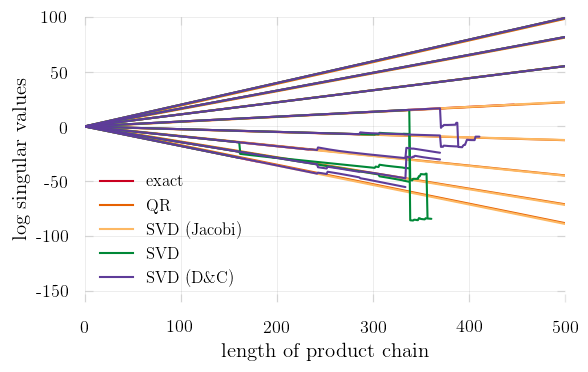

In [19]:
plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
plot!(svs_qr_udt, color="#E66101", labels = reshape(["QR", "", "","", "","", "", ""], (1,8)))
plot!(svs_gesvj, color="#FDB863", labels = reshape(["SVD (Jacobi)", "", "","", "","", "", ""], (1,8)))
plot!(svs_gesvd, color="#008837", labels = reshape(["SVD", "", "","", "","", "", ""], (1,8)))
plot!(svs_gesdd, color="#5E3C99", labels = reshape(["SVD (D\\&C)", "", "","", "","", "", ""], (1,8)))

ylabel!("log singular values")
xlabel!("length of product chain")
ylims!(-160, 100)
xlims!(0., 500.)
savefig("decomp_comparison_simple.pdf")

## Stabilization - principle issue

In [20]:
svs_naive = StableDQMC.calc_product_chain(B, N)[2];

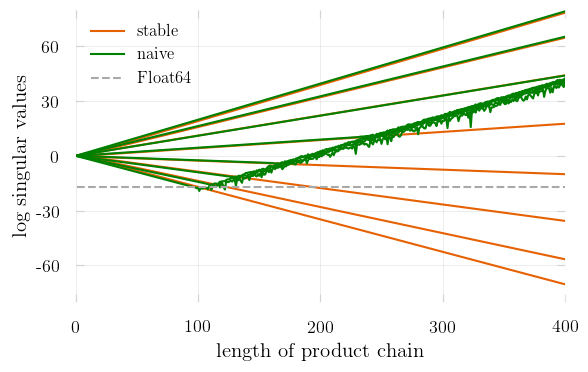

In [21]:
# plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
plot(svs_qr_udt, color="#E66101", labels = reshape(["stable", "", "","", "","", "", ""], (1,8)))
plot!(svs_naive, color=:green, labels = reshape(["naive", "", "","", "","", "", ""], (1,8)))
plot!(1:400, fill(-17, 400), color=:darkgray, linestyle=:dash, label = "Float64")

ylabel!("log singular values")
xlabel!("length of product chain")

ylims!(-80, 80)
xlims!((0., 400.))
savefig("naive_vs_stable.pdf")

In [23]:
using DoubleFloats
Bdb64 = Double64.(B)
svs_naive = StableDQMC.calc_product_chain(Bdb64, N)[2];

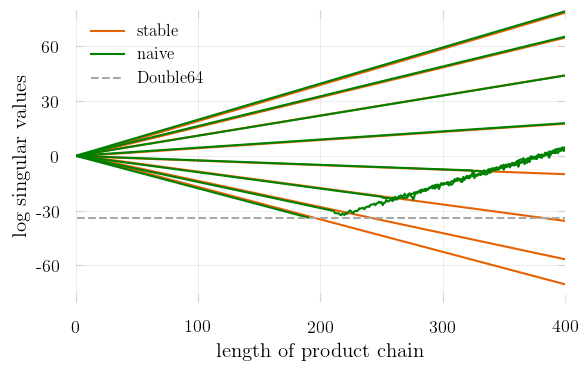

In [25]:
# plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
plot(svs_qr_udt, color="#E66101", labels = reshape(["stable", "", "","", "","", "", ""], (1,8)))
plot!(svs_naive, color=:green, labels = reshape(["naive", "", "","", "","", "", ""], (1,8)))
plot!(1:400, fill(-34, 400), color=:darkgray, linestyle=:dash, label = "Double64")

ylabel!("log singular values")
xlabel!("length of product chain")
ylims!(-80, 80)
xlims!((0., 400.))
savefig("naive_vs_stable_db64.pdf")

In [ ]:
# using PyPlot
# plt.style.use("publication_tex")
# function Inf2NaN(x)
#     y = copy(x)
#     y[findall(i -> (i == Inf || i == -Inf), y)] .= NaN
#     y = Float64.(y)
# end

# # PyPlot
# plot(Inf2NaN(svs_genericsvd), color="#CA0020", lw=2, label = "exact")
# plot(svs_qr_udt, color="#E66101", lw=2, label = "QR")
# plot(svs_gesvj, color="#FDB863", lw=2, label = "SVD (Jacobi)")
# plot(svs_gesvd, color="#008837", lw=2, label = "SVD")
# plot(svs_gesdd, color="#5E3C99", lw=2, label = "SVD (D\\&C)")

# handles, labels = gca().get_legend_handles_labels()
# ulabels = unique(labels)
# uhandles = Vector{eltype(handles)}(undef, 0)
# for l in ulabels
#     push!(uhandles, handles[findfirst(isequal(l), labels)])
# end
# legend(uhandles, ulabels, loc="lower left", prop=Dict("size" => 16))

# ylabel("log singular values")
# xlabel("length of product chain")
# ylim(-150, 85)
# xlim(0., 290.)
# savefig("decomp_comparison.pdf")

# Accuracy after inversion (Green's function)

In [412]:
Bbig = BigFloat.(B)
N = 400

setprecision(1000) do
    global U_genericsvd, D_genericsvd, X_genericsvd = StableDQMC.calc_product_chain_stabilized(Bbig, N, genericsvd);
end
U_qr_udt, D_qr_udt, X_qr_udt = StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt);
U_gesvd, D_gesvd, X_gesvd = StableDQMC.calc_product_chain_stabilized(B, N, gesvd);
U_gesdd, D_gesdd, X_gesdd = StableDQMC.calc_product_chain_stabilized(B, N, gesdd);
U_gesvj, D_gesvj, X_gesvj = StableDQMC.calc_product_chain_stabilized(B, N, gesvj);

In [413]:
setprecision(1000) do
    global G_genericsvd = inv(I + U_genericsvd * Diagonal(D_genericsvd) * X_genericsvd)
end

8×8 Array{BigFloat,2}:
  0.499989      0.431039      9.5835e-06   …   3.78482e-06  -0.114666   
  0.431039      0.499999      0.247412         0.0169684     3.78482e-06
  9.5835e-06    0.247412      0.499992        -3.32831e-06   0.131634   
 -0.183627      2.47037e-06   0.379046        -0.0519926    -7.11314e-06
 -7.11314e-06  -0.0519926     6.25519e-06      2.47037e-06  -0.183627   
  0.131634     -3.32831e-06  -0.166658     …   0.247412      9.5835e-06 
  3.78482e-06   0.0169684    -3.32831e-06      0.499999      0.431039   
 -0.114666      3.78482e-06   0.131634         0.431039      0.499989   

In [414]:
A1, A2, A3 = StableDQMC.inv_sum_udts_scalettar(Diagonal(fill(1, 8)), ones(8), Diagonal(fill(1, 8)), U_qr_udt, D_qr_udt, X_qr_udt)
G_qr_udt_scalettar = A1 * Diagonal(A2) * A3

┌ Warning: Calling somewhat inefficient `inv_sum_udts_scalettar`
└ @ Main.StableDQMC C:\Users\carsten\Desktop\sciebo\projects\sdw-qcp\notes\stabilization\StableDQMC\src\qr.jl:379


8×8 Array{Float64,2}:
  0.499989     0.431039     9.5835e-6   …   3.78482e-6  -0.114666  
  0.431039     0.499999     0.247412        0.0169684    3.78482e-6
  9.5835e-6    0.247412     0.499992       -3.32831e-6   0.131634  
 -0.183627     2.47037e-6   0.379046       -0.0519926   -7.11314e-6
 -7.11314e-6  -0.0519926    6.25519e-6      2.47037e-6  -0.183627  
  0.131634    -3.32831e-6  -0.166658    …   0.247412     9.5835e-6 
  3.78482e-6   0.0169684   -3.32831e-6      0.499999     0.431039  
 -0.114666     3.78482e-6   0.131634        0.431039     0.499989  

In [415]:
G_qr_udt = StableDQMC.inv_one_plus_udt(U_qr_udt, D_qr_udt, X_qr_udt)

┌ Warning: Calling somewhat inefficient and potentially inaccurate `inv_one_plus_udt`
└ @ Main.StableDQMC C:\Users\carsten\Desktop\sciebo\projects\sdw-qcp\notes\stabilization\StableDQMC\src\qr.jl:98


8×8 Array{Float64,2}:
  0.499989     0.431039     9.5835e-6   …   3.78482e-6  -0.114666  
  0.431039     0.499999     0.247412        0.0169684    3.78482e-6
  9.5835e-6    0.247412     0.499992       -3.32831e-6   0.131634  
 -0.183627     2.47037e-6   0.379046       -0.0519926   -7.11314e-6
 -7.11314e-6  -0.0519926    6.25519e-6      2.47037e-6  -0.183627  
  0.131634    -3.32831e-6  -0.166658    …   0.247412     9.5835e-6 
  3.78482e-6   0.0169684   -3.32831e-6      0.499999     0.431039  
 -0.114666     3.78482e-6   0.131634        0.431039     0.499989  

In [416]:
isapprox(G_qr_udt, G_qr_udt_scalettar)

true

In [417]:
maximum(G_genericsvd - G_qr_udt)

1.214407618804374834356469022091999415099915288008528088517173057735525713663111e-15

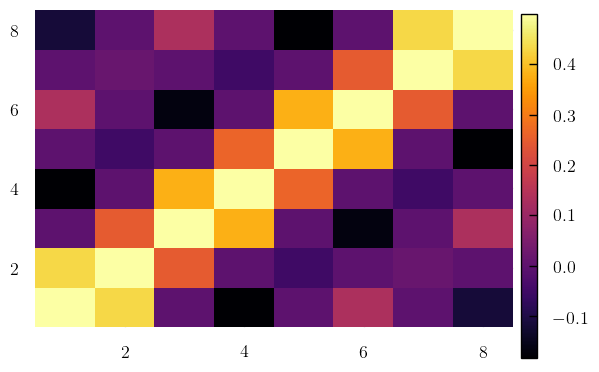

In [434]:
heatmap(Float64.(G_genericsvd))

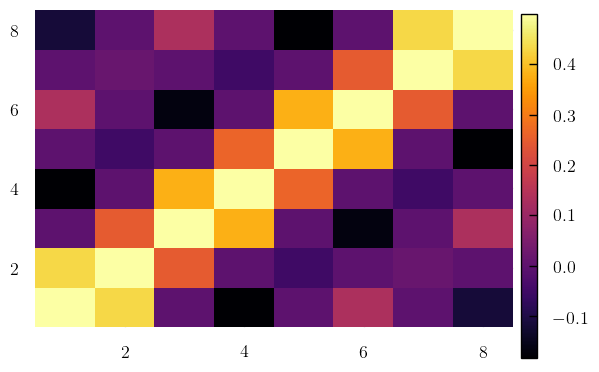

In [430]:
heatmap(G_qr_udt)

In [418]:
G_gesdd = StableDQMC.inv_one_plus_udv(U_gesdd, D_gesdd, X_gesdd)

8×8 Array{Float64,2}:
  0.715522    0.356194   -0.189526    …  -0.0578832   -0.0748503   0.100845 
  0.356193    0.525994    0.31323         0.0658225    0.0429629  -0.0748493
 -0.189527    0.313229    0.666665        1.48311e-6   0.0658235  -0.0578816
 -0.0429625  -0.0488553   0.255348       -0.123704    -0.100844    0.140672 
  0.140672   -0.100844   -0.123704        0.255348    -0.0488552  -0.0429624
 -0.0578826   0.0658219   1.25057e-7  …   0.666667     0.313231   -0.189526 
 -0.0748498   0.0429621   0.0658218       0.313231     0.525995    0.356193 
  0.100845   -0.0748495  -0.0578825      -0.189527     0.356193    0.715521 

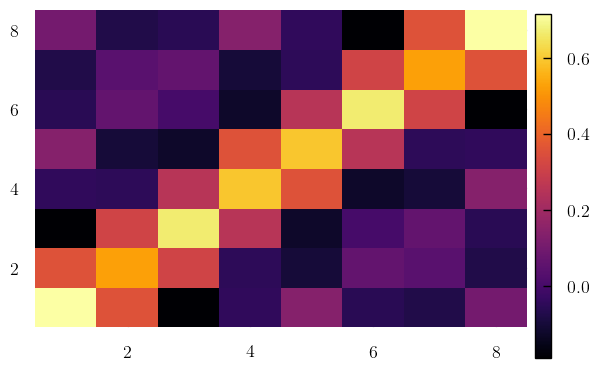

In [435]:
heatmap(G_gesdd)

In [419]:
G_gesvd = StableDQMC.inv_one_plus_udv(U_gesvd, D_gesvd, X_gesvd)

8×8 Array{Float64,2}:
  0.715521    0.356193   -0.189526     …  -0.0578827  -0.0748498   0.100845 
  0.356193    0.525995    0.313231         0.0658218   0.0429621  -0.0748498
 -0.189526    0.313231    0.666667         7.292e-16   0.0658218  -0.0578827
 -0.0429621  -0.0488547   0.255348        -0.123705   -0.100845    0.140672 
  0.140672   -0.100845   -0.123705         0.255348   -0.0488547  -0.0429621
 -0.0578827   0.0658218   2.75373e-15  …   0.666667    0.313231   -0.189526 
 -0.0748498   0.0429621   0.0658218        0.313231    0.525995    0.356193 
  0.100845   -0.0748498  -0.0578827       -0.189526    0.356193    0.715521 

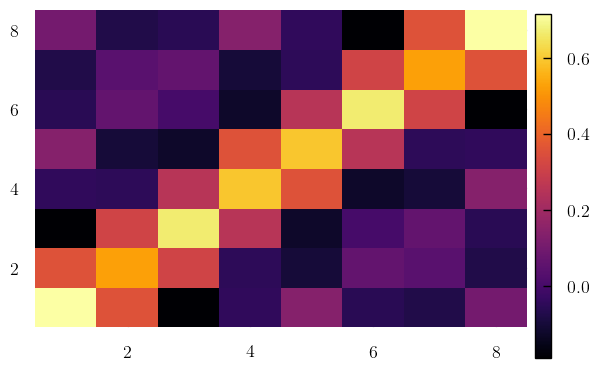

In [436]:
heatmap(G_gesvd)

In [420]:
G_gesvj = StableDQMC.inv_one_plus_udv(U_gesvj, D_gesvj, X_gesvj)

8×8 Array{Float64,2}:
 -0.0988063  -1.75544   -3.16821   …   2.38804    0.822019  -0.563666 
 -0.164249   -3.04129   -5.4241        3.65459    0.42676   -1.83574  
  0.0765337   2.58622    4.60866      -3.1682     0.129603   2.13903  
  0.205854   -0.165982  -0.468278      1.53958    0.693387  -0.0505081
  0.482271    1.85247    2.84761       0.481737   2.02857    2.2425   
 -0.495572   -0.993202  -1.16524   …  -1.07962   -1.6979    -1.41589  
  0.263659   -1.6391    -3.42674       2.30739   -0.201288  -1.7153   
 -0.0526852   2.3717     4.48674      -2.09869    1.14121    2.73623  

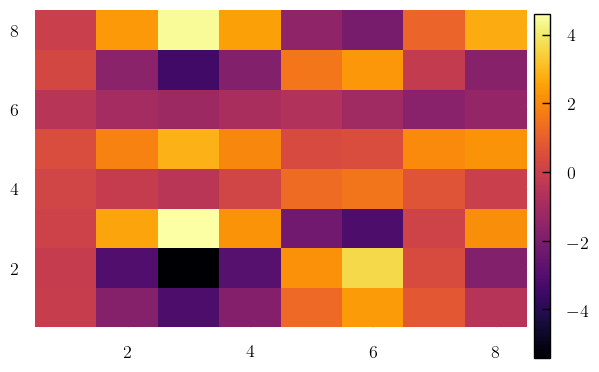

In [437]:
heatmap(G_gesvj)

In [421]:
maximum(G_gesdd - G_genericsvd)

0.2155326444541322085791268128015275837281381444714891353030384086274810643594367

In [422]:
maximum(G_gesvd - G_genericsvd)

0.2155323004600742166772124629580810652263144276667263512808406342418364586340589

In [423]:
maximum(G_gesvj - G_genericsvd)

4.355109564583897487662139228925919607084399982251174775003420914463659229700587

# Accuracy of determinant

In [424]:
function det_G_udt(U,D,T)
  m = U' / T
  m[diagind(m)] .+= D
  u,d,t = decompose_udt(m)
  prod(1 ./ d)
end

function det_G_udv(U,D,Vd)
  inner = copy(Vd')
  inner .+= U * Diagonal(D)
  I = decompose_udv!(inner)
  prod(1 ./ I[2])
end

function det_G_udv(U::Matrix{BigFloat},D,Vd::Matrix{BigFloat})
  inner = copy(Vd')
  inner .+= U * Diagonal(D)
  I = StableDQMC.genericsvd!(inner)
  prod(1 ./ I[2])
end

det_G_udv (generic function with 3 methods)

In [425]:
det_G_udv(U_genericsvd, D_genericsvd, T_genericsvd)

2.415459762981586189198799229705227778406996756806721643319788977859410684133122e-90

In [426]:
det_G_udt(U_qr_udt, D_qr_udt, T_qr_udt)

2.415215321002101e-90

In [427]:
det_G_udv(U_gesvd, D_gesvd, T_gesvd)

1.4233489612537535e-82

In [428]:
det_G_udv(U_gesdd, D_gesdd, T_gesdd)

1.4233457043753263e-82

In [429]:
det_G_udv(U_gesvj, D_gesvj, T_gesvj)

1.3704146930140464e-88